In [21]:
# ==========================================
# IMPORTS (FINAL + COMPLETE)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# ==========================================
# LOAD DATASET (correct path for notebook inside /notebooks/)
# ==========================================
df = pd.read_csv("../data/claim_denial_dataset.csv")

# Preview first rows
df.head()


,ClaimID,Patient_Age,Insurance_Type,Provider_Type,Claim_Amount,Num_Procedures,Diagnosis_Category,Prior_Denials,Claim_Complexity,Submission_Type,Denied
0,1,69,Medicaid,Emergency,12276.46,7,Endocrine,1,Low,Electronic,0
1,2,32,Medicare,Primary Care,6861.38,5,Cardiology,2,High,Electronic,0
2,3,89,Medicaid,Primary Care,12006.12,5,Oncology,4,High,Electronic,1
3,4,78,HMO,Urgent Care,9731.36,5,Injury,2,Low,Electronic,1
4,5,38,PPO,Surgery,104.01,4,GI,2,Low,Electronic,0


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClaimID             5000 non-null   int64  
 1   Patient_Age         5000 non-null   int64  
 2   Insurance_Type      5000 non-null   object 
 3   Provider_Type       5000 non-null   object 
 4   Claim_Amount        5000 non-null   float64
 5   Num_Procedures      5000 non-null   int64  
 6   Diagnosis_Category  5000 non-null   object 
 7   Prior_Denials       5000 non-null   int64  
 8   Claim_Complexity    5000 non-null   object 
 9   Submission_Type     5000 non-null   object 
 10  Denied              5000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 429.8+ KB

=== Data Description ===


,ClaimID,Patient_Age,Claim_Amount,Num_Procedures,Prior_Denials,Denied
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,53.299000,7456.005860,4.078800,2.016600,0.338400
std,1443.520003,20.646851,4295.898629,1.982165,1.413479,0.473213
min,1.000000,18.000000,52.620000,1.000000,0.000000,0.000000
25%,1250.750000,36.000000,3723.522500,2.000000,1.000000,0.000000
50%,2500.500000,53.000000,7433.785000,4.000000,2.000000,0.000000
75%,3750.250000,71.000000,11070.482500,6.000000,3.000000,1.000000
max,5000.000000,89.000000,14998.400000,7.000000,4.000000,1.000000



=== Denial Distribution ===


Denied
0    0.6616
1    0.3384
Name: proportion, dtype: float64


=== Missing Values ===
ClaimID               0
Patient_Age           0
Insurance_Type        0
Provider_Type         0
Claim_Amount          0
Num_Procedures        0
Diagnosis_Category    0
Prior_Denials         0
Claim_Complexity      0
Submission_Type       0
Denied                0
dtype: int64


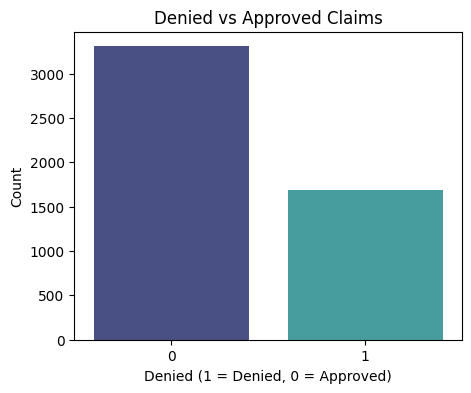

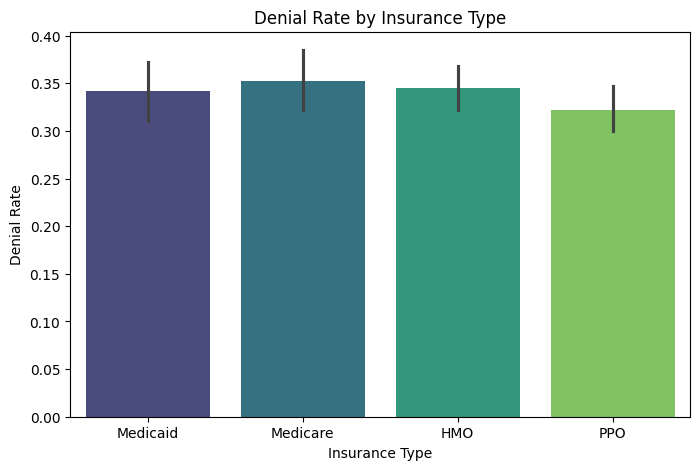

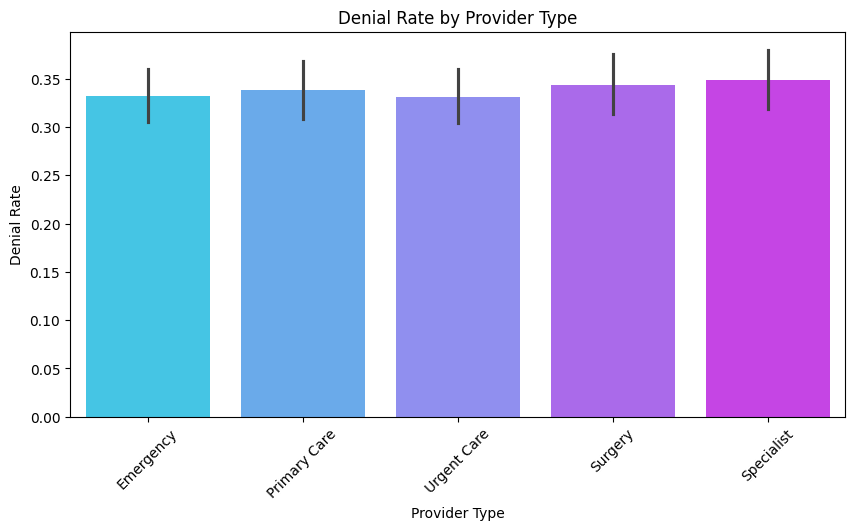

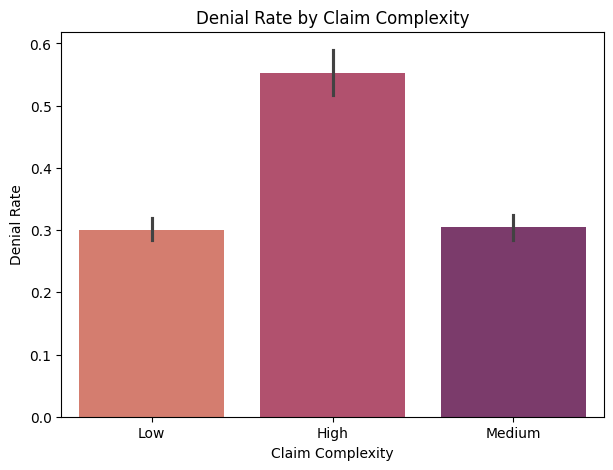

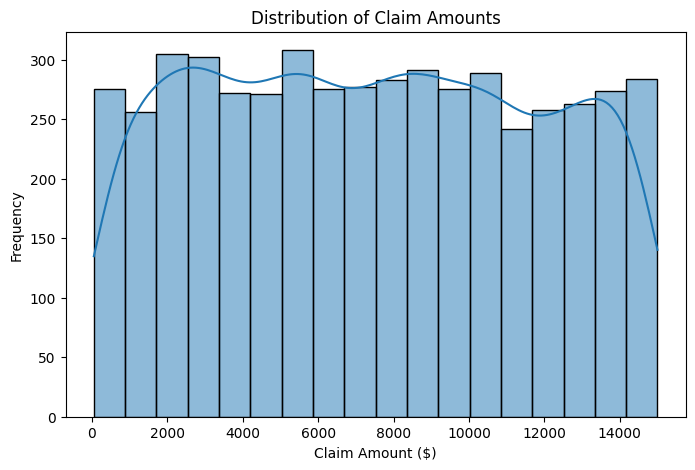

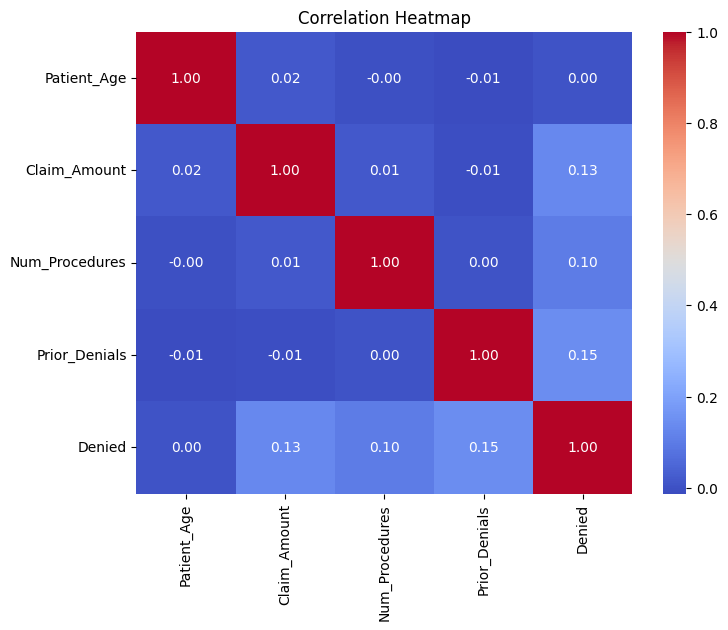

In [22]:
# ==========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================

# Basic dataset info
print("=== Data Info ===")
df.info()
print("\n=== Data Description ===")
display(df.describe())
print("\n=== Denial Distribution ===")
display(df['Denied'].value_counts(normalize=True))

# Missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# -----------------------------
# Plot 1: Denied vs Approved
# -----------------------------
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Denied", hue="Denied", dodge=False, legend=False, palette="mako")
plt.title("Denied vs Approved Claims")
plt.xlabel("Denied (1 = Denied, 0 = Approved)")
plt.ylabel("Count")
plt.show()

# -----------------------------
# Plot 2: Denial Rate by Insurance Type
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Insurance_Type", y="Denied", hue="Insurance_Type", legend=False, palette="viridis")
plt.title("Denial Rate by Insurance Type")
plt.ylabel("Denial Rate")
plt.xlabel("Insurance Type")
plt.show()

# -----------------------------
# Plot 3: Denial Rate by Provider Type
# -----------------------------
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Provider_Type", y="Denied", hue="Provider_Type", legend=False, palette="cool")
plt.title("Denial Rate by Provider Type")
plt.xticks(rotation=45)
plt.ylabel("Denial Rate")
plt.xlabel("Provider Type")
plt.show()

# -----------------------------
# Plot 4: Denial Rate by Claim Complexity
# -----------------------------
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Claim_Complexity", y="Denied", hue="Claim_Complexity", legend=False, palette="flare")
plt.title("Denial Rate by Claim Complexity")
plt.ylabel("Denial Rate")
plt.xlabel("Claim Complexity")
plt.show()

# -----------------------------
# Plot 5: Distribution of Claim Amounts
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Claim_Amount"], kde=True)
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount ($)")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# Plot 6: Correlation Heatmap
# -----------------------------
plt.figure(figsize=(8,6))
corr_matrix = df[["Patient_Age","Claim_Amount","Num_Procedures","Prior_Denials","Denied"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       662
           1       0.52      0.29      0.37       338

    accuracy                           0.67      1000
   macro avg       0.61      0.58      0.57      1000
weighted avg       0.64      0.67      0.64      1000



<Figure size 600x600 with 0 Axes>

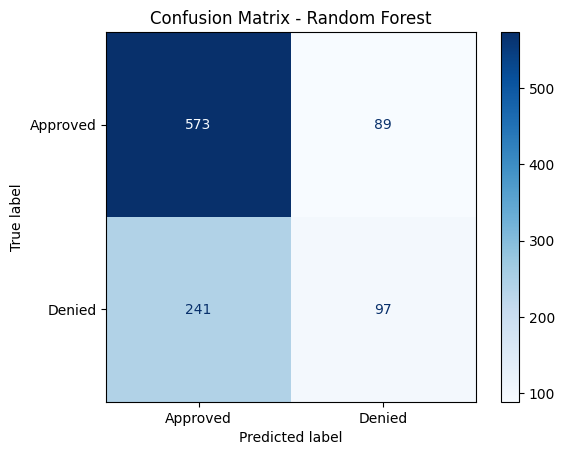

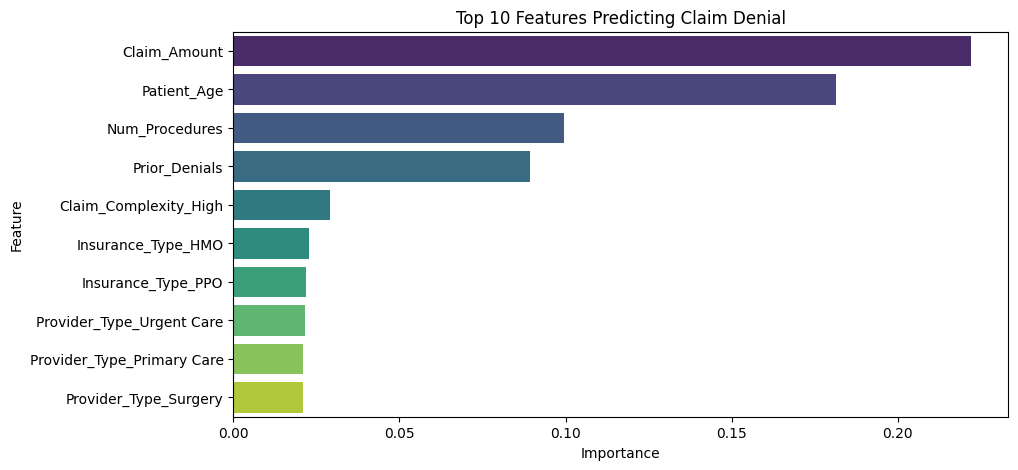

In [23]:
# ==========================================
# PREPROCESSING + MODELING
# ==========================================

# Numeric & Categorical Features
numeric_features = ["Patient_Age", "Claim_Amount", "Num_Procedures", "Prior_Denials"]
categorical_features = [
    "Insurance_Type", 
    "Provider_Type", 
    "Diagnosis_Category",
    "Claim_Complexity", 
    "Submission_Type"
]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Separate features and target
X = df.drop("Denied", axis=1)
y = df["Denied"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Random Forest Pipeline
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# ==========================================
# CLASSIFICATION REPORT
# ==========================================
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# ==========================================
# CONFUSION MATRIX
# ==========================================
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Approved","Denied"])

plt.figure(figsize=(6,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ==========================================
# FEATURE IMPORTANCE
# ==========================================

# Get encoded feature names
encoded_cat = (
    rf_model.named_steps["preprocessor"]
        .named_transformers_["cat"]
        .get_feature_names_out(categorical_features)
)

# Combine numerical + encoded categorical features
all_features = np.concatenate([numeric_features, encoded_cat])

# Importances
importances = rf_model.named_steps["classifier"].feature_importances_

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
})

# Sort and take top 10
top_features = importance_df.sort_values("Importance", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_features,
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Features Predicting Claim Denial")
plt.show()


In [24]:
# ==========================================
# SAVE MODEL + CLEANED DATASET
# ==========================================

import joblib
import os

# Create models folder (one level up from notebooks/)
os.makedirs("../models", exist_ok=True)

# Create data folder (already exists but safe to enforce)
os.makedirs("../data", exist_ok=True)

# -----------------------------
# Save Random Forest model
# -----------------------------
joblib.dump(rf_model, "../models/random_forest_model.pkl")

# -----------------------------
# Save cleaned dataset
# -----------------------------
df.to_csv("../data/cleaned_claims_dataset.csv", index=False)

"Models and dataset saved successfully!"


'Models and dataset saved successfully!'